# 4. 분류

## 4.1 분류의 개요

지도학습이란 label과 같은 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 학습 방법이다. 지도학습의 대표적인 유형인 분류(Cassification)는 학습 데이터로 주어진 데이터의 feature와 label을 ML 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 새로운 데이터가 주어질 때 미지의 label 값을 예측하는 것이다.

분류의 다양한 ML 알고리즘  
* 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
*독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
*데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
*개별 class 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
*근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor) 알고리즘
*심층 연결 기반의 신경망(Neural Network)
*서로 다른(또는 같은) ML 알고리즘을 결합한 앙상블(Ensemble)

앙상블은 서로 다른(또는 같은) 알고리즘을 단순히 결합한 형태도 있으나, 일반적으로 배깅(Bagging)과 부스팅(Boosting) 방식으로 나뉜다. 배깅 방식의 대표가 랜덤 포레스트(Random Forest)이며 뛰어난 예측 성능, 빠른 수행시간 등으로 많이 애용된다. 근래에는 부스팅 방식으로 지속 발전하고 있다. 가장 처음의 부스팅 방식인 그래디언트 부스팅(Gradient Boosting)은 뛰어난 예측 성능을 가졌지만 수행 시간이 너무 오래 걸려 최적화 튜닝이 어려웠다. 하지만 XgBoost(eXtra Gradient Boost)와 LightBGM 등 기존 그래디언트 부스팅의 예측 성능을 한 단계 발전시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하면서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘으로 자리잡았다.

## 4.2 결정 트리

결정 트리는 ML 알고리즘 중 직관적으로 이애하기 쉬운 알고리즘이다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내는 트리(Tree) 기반의 분류 규칙을 만드는 것이다. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것인데, 이 룰 기반의 프로그램에 적용되는 if/else를 자동으로 찾아내서 예측을 위한 규칙을 만드는 알고리즘으로 이해하면 쉽다. 따라서 데이터의 어떤 기준을 바탕으로 규칙을 만들어 내는지에 따라 알고리즘의 성능이 크게 좌우된다.

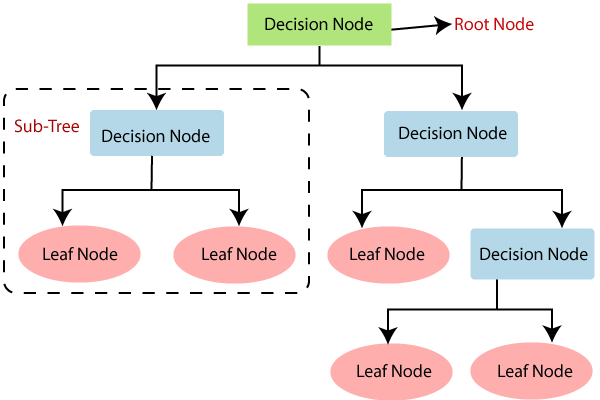

규칙 노드(Decision Node)는 규칙 조건이 되고, 리프 노드(Leaf Node)는 결정 class 값이다. 그리고 새로운 구칙 조건마다 서브 트리(Sub Tree)가 생성된다.  
즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 수 있다.  
데이터를 분류할 때 최대한 많은 dataset이 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. 이를 위해서 트리(Tree)를 어떻게 분할(Split)할 지가 중요한데 최대한 균일한 dataset을 구성할 수 있도록 분할하는 것이 필요하다.

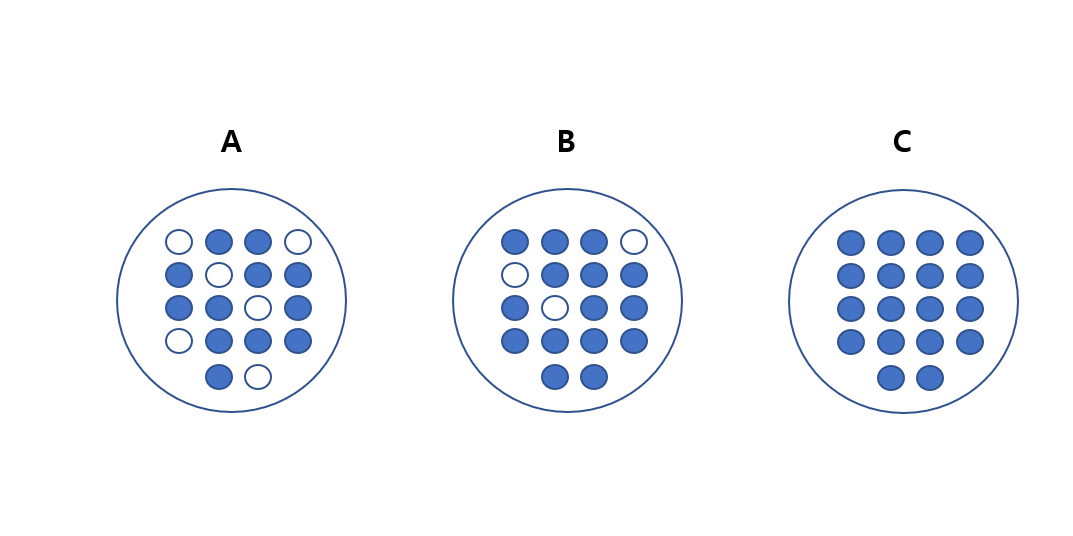

위의 이미지에서 C, B, A 순으로 균일도가 높다. dataset의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미친다. 무작위로 dataset C에서 데이터를 뽑는다면 데이터에 대한 정보가 없어도 검은 공일 것이라고 간단하게 예측이 가능하다. 하지만 A에서 뽑는다면 상대적으로 균일도가 낮아서 같은 조건으로 데이터를 판단할 경우 더 많은 정보가 필요하다.

결정 노드는 정보 균일도가 높은 dataset을 먼저 선택할 수 있도록 규칙 조건을 만든다. 즉, 정보 균일도가 dataset이 쪼개질 수 있도록 조건을 찾아 서브 dataset을 만들고, 다시 서브 dataset에서 균일도가 높은 자식 dataset으로 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측한다.  
이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain) 지수와 지니 계수가 있다.  
* 정보 이득은 엔트로피라는 개념을 기반으로 한다. 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 즉, 1 - 엔트로피 지수이다. 결정 트리는 이 정보 이득 지수로 분할 기준을 정한다. 즉, 정보 이득이 높은 속성을 기준으로 분할한다.

* 지니 계수는 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수이다. 경제학자인 코라도 지니(Corrado Gini)의 이름에서 딴 계수로서 0이 가장 평등하고 1로 갈수록 불평등하다. 머신러닝에 적용될 때는 지니 계수가 낮을수록 데이터 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할한다.

사이킷런에서 구현한 결정 트리 알고리즘인 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 dataset을 분할한다. 결정 트리의 일반적인 알고리즘은 dataset을 분할하는 데 가장 좋은 조건인 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.

### 결정 트리 모델의 특징

결정 트리의 가장 큰 장점은 정보의 균일도를 기반으로 하고 있어 알고리즘이 쉽고 직관적이라는 것이다. 균일도라는 룰이 매우 명확하기 때문에 규칙 노드와 리프 노드가 어떻게 만들어지는지 알 수 있고, 시각화도 가능하며 다른 룰이 없기 때문에 각 feature의 스케일링이나 정규화 같은 전처리 작업이 필요없다. 하지만 가장 큰 단점으로는 과적합에 걸리기 쉽다는 것이다. 균일도에 따라 서브 트리를 계속 만들게 되면 feature가 많아지고 트리의 깊이가 커져서 복잡해진다. 실제로 모든 데이터의 상황을 만족하는 완벽한 규칙을 만들지 못하는 경우가 더 많음에도 결정트리 알고리즘은 학습 데이터에 대해 모델의 정확도를 높이기 위해 계속해서 조건을 추가하여 복잡한 모델이 된다. 복잡한 모델은 실제 상황에서 유연한 대처가 어렵기 때문에 예측 성능이 떨어질 수 밖에 없다. 따라서 완벽한 규칙을 만들 수 없다고 인정하여 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 더 도움이 될 수 있다.'

### 결정 트리 파라미터

사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor클래스를 제공한다. 
전자는 분류를 위한 클래스, 후자는 회귀를 위한 클래스이다.
결정트리 구현은 CART기반 알고리즘이다. CART는 분류와 회귀에 사용할 수 있는 트리 알고리즘이다.

### 결정 트리 모델의 시각화

Graphviz 패키지는 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여준다.

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

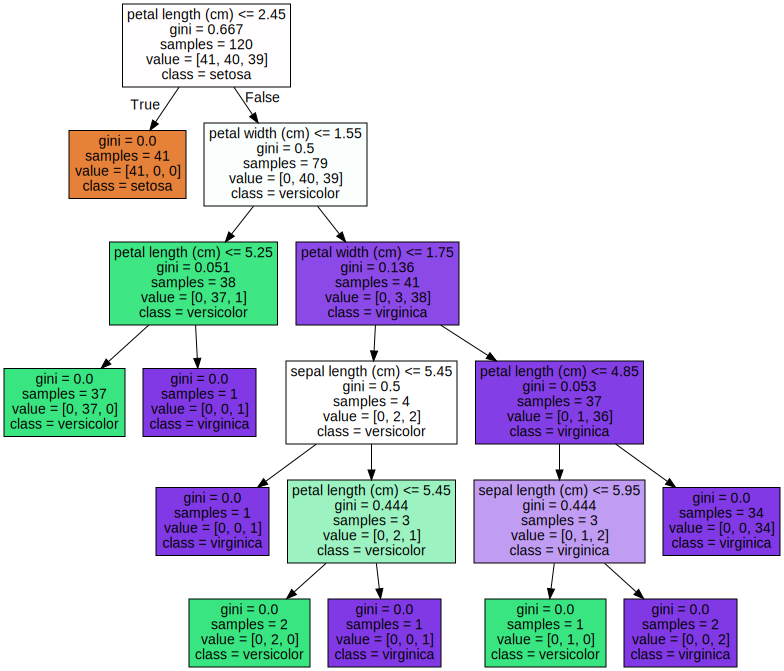

In [11]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

출력된 결과로 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성되어 있는지 알 수 있다. 자식 노드가 있으면 브랜치 노드이고, 없으면 리프 노드이다.

* petal length(cm) <= 2.45 와 같이 feature의 조건이 있는 것은 자식노드를 만들기 위한 규칙 조건이다. 리프 노드에는 없는 지표이다.
* gini는 다음의 value안의 데이터 분포에서의 지니 계수이다.
* samples는 현재 노드의 데이터 수이다.
* value는 class 값 기반의 데이터 수이다. 붓꽃 dataset은 class값으로 0, 1, 2 가지기 때문에 길이가 3이다.

그리고 트리 구조의 첫 줄 노드부터 깊이(depth)를 1로 새어 위의 이미지와 같은 트리 구조는 깊이가 6인 트리 구조이며, depth가 낮고 왼쪽에 있는 노드부터 번호를 매겨 순서를 정하여 루트 노드는 1번 노드로 불린다.

4번 노드를 보면 value가 [0, 37, 1]로 되어 이를 구분하기 위해 자식노드를 다시 생성한다. 이처럼 결정 트리는 완벽한 규칙을 찾기 위해 트리 노드를 계속 만들기 때문에 매우 복잡한 트리 구조를 만들기 쉬워져서 과적합이 상당히 많이 일어나는 ML 알고리즘이다. 그래서 결정 트이 알고리즘을 제어하는 대부분의 hyper parameter는 복잡한 tree가 생성되는 것을 막기 위한 용도이다.

리프 노드는 자식 노드가 없는 노드를 말하는데 min_samples_split는 리프 노드가 될 수 있는 최소한의 samples의 수를 말한다. 따라서 위와 같은 경우엔 분할하여 자식 노드로 만들어 질 경우 해당 자식 노드들 안의 samples의 수가 최소 4 이상이어야 한다.  

결정 트리는 균일도에 기반해 어떤 속성을 규칙조건으로 선택하느냐가 중요한 요건이다. 중요한 몇 개의 피처가 명확한 규칙 트리를 만드는데 크게 기여하며 모델을 좀더 간결하고 이상치에 강한 모델을 만들 수 있다.

결정 트리는 균일도에 기반하여 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다. 중요한 feature들이 명확한 규칙 트리를 만드는 데 크게 기여하며, 모델을 간결하게 만들어 준다. 사이킷런은 이러한 규칙을 정하는데 있어 각 feature의 중요도를 featureimportances를 통해 제공한다.

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

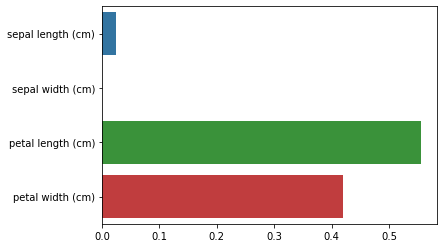

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

### 결정 트리 과적합

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하고 이로 인한 과적합 문제를 시각화해보겠다.

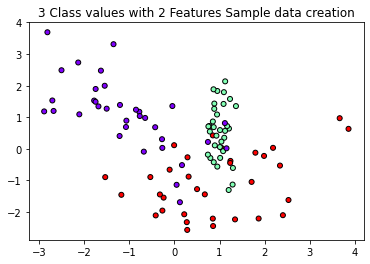

In [14]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성. 
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨. 
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

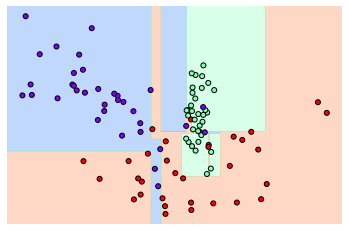

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
  
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
  
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

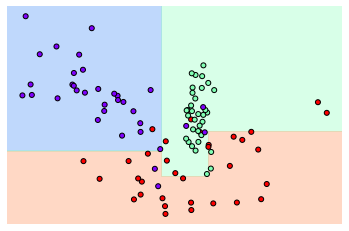

In [16]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:')
for i in range(10):
    print(feature_name[i])

전체 피처명에서 10개만 추출:
tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X


In [20]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [36]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):

    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [37]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}\n'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:')
hyper_parameters = dt_clf.get_params()
for hyper_parameter in hyper_parameters.items():
    print(hyper_parameter)

결정 트리 예측 정확도: 0.8548

DecisionTreeClassifier 기본 하이퍼 파라미터:
('ccp_alpha', 0.0)
('class_weight', None)
('criterion', 'gini')
('max_depth', None)
('max_features', None)
('max_leaf_nodes', None)
('min_impurity_decrease', 0.0)
('min_samples_leaf', 1)
('min_samples_split', 2)
('min_weight_fraction_leaf', 0.0)
('random_state', 156)
('splitter', 'best')


In [39]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8 ,10, 12, 16 ,20, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [43]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [44]:
params = {'max_depth' : [8, 12, 16, 20], 'min_samples_split' : [16, 24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [45]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


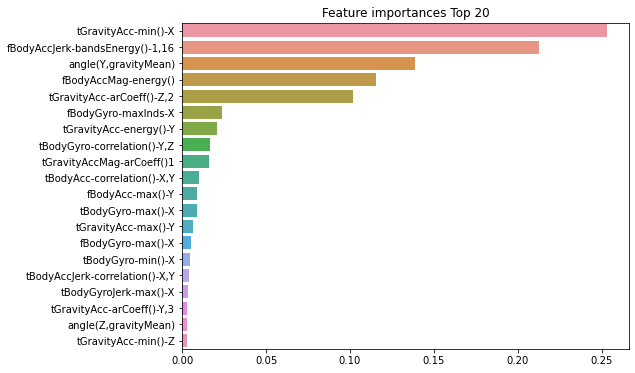

In [46]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 앙상블 학습

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다. 대표적인 앙상블 알고리즘은 랜덤 포레스트와 그래디언트 부스팅은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 많이 애용도어왔다. 특히, 부스팅 계열의 알고리즘의 개발이 가속화되어 '매력적인 솔루션'으로 불리는 XGBoost, XGBoost와 유사한 성능을 보이면서 훨씬 빠른 수행 속도를 가진 LightGBM, 여러 가지 모델의 결과를 기반으로 메타 모델을 수립하는 스태킹(Stacking)을 포함하여 다양한 유형의 앙상블 알고리즘이 머신러닝의 선도 알고리즘으로 인기를 모으고 있다.

### 보팅 유형 - 하드 보팅과 소프트 보팅

보팅에는 하드 보팅과 소프트 보팅이 있다. 하드 보팅을 이용한 분류는 다수결 원칙과 비슷하다. 예측 결과들중 다수의 분류기가 결정한 예측 값을 최종 보팅 결과값으로 선정하는 것이다. 소프트 보팅은 분류기들의 label 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 label 값을 최종 보팅 결과값으로 선정한다. 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용된다.

### 보팅 분류기

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf), ('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


VotingClassifier 클래스는 주요 인자로 estimator와 voting 값을 입력 받는다. estimators는 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력 받고, voting은 defalut는 'hard'로 되어 있어 소프트 보팅 방식을 적용하려면 'soft'를 입력해주면 된다.

## 랜덤 포레스트

### 개요 및 실습

배깅(Bagging)의 대표적인 알고리즘은 랜덤 포래스트이다. 랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지며, 다양한 영역에서 높은 예측 성능을 보이고 있다. 랜덤 포레스트의 기반 알고리즘은 결정 트리이며, 결정 트리의 장점인 쉽고 직관적인 점을 그대로 가지고 있다.

In [49]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] > 0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
   
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
   
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
   
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
   
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
   
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
   
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝

트리 기반의 앙상블 알고리즘의 단점을 굳이 뽑는다면 hyper parameter가 너무 많아 튜닝 시간이 많이 소모되는 것이고, 많은 시간을 소모하여 튜닝을 한 후에도 예측 성능은 크게 상향되지 않는다. 그나마 랜덤 포레스트가 적은 편에 속하는데 결정 트리를 사용하여 hyper parameter가 대부분 동일하기 때문이다.

In [50]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [51]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


In [52]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


## GBM(Gradient Boosting Machine)

### 개요 및 실습

부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습/예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다. 부스팅의 대표적인 구현은 AdaBoost(Adaptive boosting)과 그래디언트 부스트(Gradient Boost)가 있다. 에이다 부스트(AdaBoost)는 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.

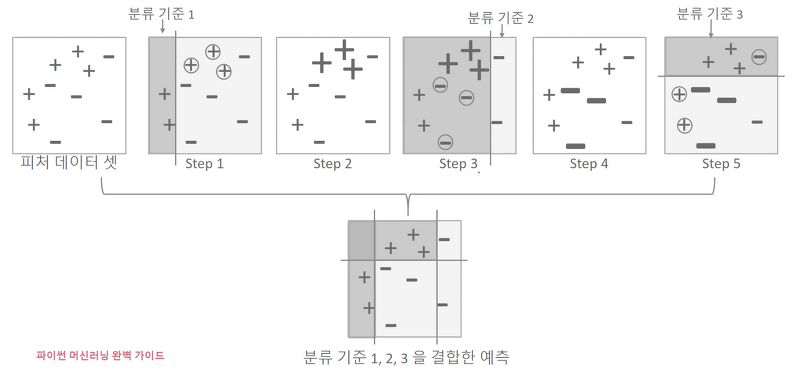

위 이미지처럼 "+"와 "-"로 구성된 피쳐 dataset이 있다면 weak learner 분류기 1이 step 1에서 분류를 하고 step 2에선 잘못 분류한 data에 가중치를 부여한다. 이 과정을 step 5까지 반복하면 총 3개의 weak learner 분류기를 통해 분류를 하게 되고 1개의 weak learner 분류기를 사용할 때보다 정확도가 높아진 것을 알 수 있다.  
GBM(Gradient Boosting Machine)도 AdaBoost와 비슷하지만 가중치 업데이트를 경사하강법(Gradient Descent)을 이용하는 것이 가장 큰 차이이다. 오류값은 (실제값-예측값)이 되고 이 오류 식을 최소화하는 방향으로 반복적으로 가중치를 업데이트한다. 그리고 GBM은 CART 기반의 다른 알고리즘과 마찬가지로 분류 뿐만 아니라 회귀도 가능하다.

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 1263.7 초 


### 하이퍼 파라미터 및 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))